In [2]:
import os
import librosa   
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import tensorflow as tf

In [4]:
train_audio_path = 'D:/SD/'

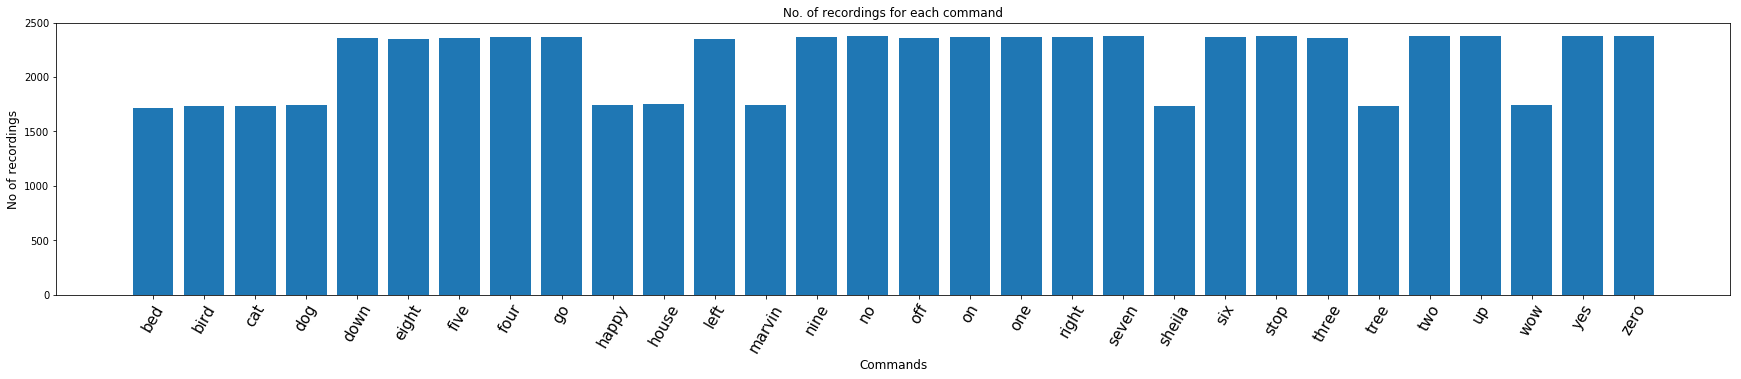

In [5]:
train_audio_path = 'D:/SD/'
labels=os.listdir(train_audio_path)
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [39]:
labels.remove('_background_noise_')

In [40]:
train_audio_path = 'D:/SD/'
all_wave = []
all_label = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
from tensorflow.keras.utils import to_categorical
y=to_categorical(y, num_classes=len(labels))

In [47]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [48]:
all_wave.shape

(58252, 8000, 1)

In [55]:
np.save('train.npy',all_wave)

In [56]:
np.save('yt.npy',y)